# Impact of Key Player Absences on Team and Individual Performance
## Overview
This analysis investigates the impact of absences of key players on the performance of Partizan Mozzart Bet Belgrade during the 2022/23 season. The dataset, sourced from `../data/partizan_2022_cleaned.csv`, contains game-by-game statistics for the team and individual players across 39 rounds. Key players are defined as the top five in total playing time, and their absences are analyzed to assess effects on team points and valuation.

In [13]:
import pandas as pd

file_path = "../data/partizan_2022_cleaned.csv"

df = pd.read_csv(file_path)

In [14]:
# filter
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
team = df[df['player'] == 'PARTIZAN MOZZART BET BELGRADE'].copy()

This separation enables focused analysis of individual contributions versus overall team performance, setting the foundation for identifying key players and their absences.

Key players are identified as the top five individuals with the most total playing time (measured in seconds).

In [15]:
# aggregate total seconds per player
player_totals = players.groupby("player")["total_seconds"].sum().sort_values(ascending=False)


key_players = player_totals.head(5).index.tolist()
print("Key Players Identified:", key_players)

Key Players Identified: ['Leday Zach', 'Lessort Mathias', 'Punter Kevin', 'Exum Dante', 'Nunnally James']


The key players - Leday Zach, Lessort Mathias, Punter Kevin, Exum Dante, and Nunnally James - are the most utilized players, suggesting their absences could significantly influence team outcomes.

Absences are identified across all 39 game rounds by checking where key players either did not appear or had zero seconds played while not marked as playing.

In [5]:
# identify all games
all_rounds = players['round'].unique()
total_rounds = len(all_rounds)
print(f"Total games (rounds): {total_rounds}")

# create expected combinations
expected_combinations = pd.DataFrame(
    [(round_, player) for round_ in all_rounds for player in key_players],
    columns=["round", "player"]
)

# merge to track absences
player_data = players[players['player'].isin(key_players)][['round', 'player', 'total_seconds', 'is_playing']]
merged = expected_combinations.merge(player_data, on=['round', 'player'], how='left')

# define absences: missing row OR (total_seconds == 0 AND is_playing == False)
merged['is_absent'] = (merged['total_seconds'].isna()) | ((merged['total_seconds'] == 0) & (merged['is_playing'] == False))

# count absences
for player in key_players:
    absences = merged[merged['player'] == player]['is_absent'].sum()
    print(f"{player} absences: {absences}")

Total games (rounds): 39
Leday Zach absences: 0
Lessort Mathias absences: 1
Punter Kevin absences: 2
Exum Dante absences: 1
Nunnally James absences: 2


### Interpretation

- **LeDay, Zach**: No absences, indicating consistent availability.
- **Lessort, Mathias and Exum, Dante**: Each missed 1 game.
- **Punter, Kevin and Nunnally, James**: Each missed 2 games.

With only 6 total absences across 39 games, the roster appears stable, but the impact of these absences can still be significant.

Team points are compared when each key player is present versus absent.

In [6]:
# pivot to track absences per round
absence_pivot = merged.pivot_table(
    index="round", 
    columns="player", 
    values="is_absent", 
    aggfunc="first"
).fillna(False)

# merge with team data
team_with_absences = team.merge(absence_pivot, on="round", how="left")


# analyze team performance
for player in key_players:
    present_games = team_with_absences[team_with_absences[player] == False]["points"]
    absent_games = team_with_absences[team_with_absences[player] == True]["points"]
    print(f"\nTeam Points - {player}:")
    print(f"Present: {present_games.mean():.2f} points (n={len(present_games)} games)")
    if len(absent_games) > 0:
        print(f"Absent: {absent_games.mean():.2f} points (n={len(absent_games)} games)")
    else:
        print(f"Absent: No absences recorded")


Team Points - Leday Zach:
Present: 85.44 points (n=39 games)
Absent: No absences recorded

Team Points - Lessort Mathias:
Present: 85.58 points (n=38 games)
Absent: 80.00 points (n=1 games)

Team Points - Punter Kevin:
Present: 85.78 points (n=37 games)
Absent: 79.00 points (n=2 games)

Team Points - Exum Dante:
Present: 86.16 points (n=38 games)
Absent: 58.00 points (n=1 games)

Team Points - Nunnally James:
Present: 85.35 points (n=37 games)
Absent: 87.00 points (n=2 games)


### Interpretation

- **LeDay, Zach**: No absences, so the team averaged 85.44 points across all games with him.
- **Lessort, Mathias**: Team scored 5.58 points less when absent (80.00 vs. 85.58).
- **Punter, Kevin**: Team scored 6.78 points less when absent (79.00 vs. 85.78).
- **Exum, Dante**: A significant drop of 28.16 points when absent (58.00 vs. 86.16), though based on one game.
- **Nunnally, James**: Team scored slightly more when absent (87.00 vs. 85.35), but with only two games, this may not be conclusive.

Absences generally reduce scoring, except for Nunnally, James, where the effect is neutral or slightly positive.

Team valuation (a composite performance metric) is compared when each key player is present versus absent.

In [7]:
# pivot to track absences per round
absence_pivot = merged.pivot_table(
    index="round", 
    columns="player", 
    values="is_absent", 
    aggfunc="first"
).fillna(False)

# merge with team data
team_with_absences = team.merge(absence_pivot, on="round", how="left")


# analyze team performance
for player in key_players:
    present_games = team_with_absences[team_with_absences[player] == False]["valuation"]
    absent_games = team_with_absences[team_with_absences[player] == True]["valuation"]
    print(f"\nTeam Valuation - {player}:")
    print(f"Present: {present_games.mean():.2f} valuation (n={len(present_games)} games)")
    if len(absent_games) > 0:
        print(f"Absent: {absent_games.mean():.2f} valuation (n={len(absent_games)} games)")
    else:
        print(f"Absent: No absences recorded")


Team Valuation - Leday Zach:
Present: 93.64 valuation (n=39 games)
Absent: No absences recorded

Team Valuation - Lessort Mathias:
Present: 93.87 valuation (n=38 games)
Absent: 85.00 valuation (n=1 games)

Team Valuation - Punter Kevin:
Present: 94.41 valuation (n=37 games)
Absent: 79.50 valuation (n=2 games)

Team Valuation - Exum Dante:
Present: 94.68 valuation (n=38 games)
Absent: 54.00 valuation (n=1 games)

Team Valuation - Nunnally James:
Present: 93.19 valuation (n=37 games)
Absent: 102.00 valuation (n=2 games)


### Interpretation

- **LeDay, Zach**: No absences, with a consistent valuation of 93.64.
- **Lessort, Mathias**: Valuation dropped by 8.87 when absent (85.00 vs. 93.87).
- **Punter, Kevin**: Valuation decreased by 14.91 when absent (79.50 vs. 94.41).
- **Exum, Dante**: A large drop of 40.68 in valuation when absent (54.00 vs. 94.68), though from one game.
- **Nunnally, James**: Valuation increased by 8.81 when absent (102.00 vs. 93.19), mirroring the points trend.

The pattern aligns with points, showing negative impacts from most absences, except for Nunnally, James.

Plot visualizes team valuation, comparing the average when each key player is present to individual games when they are absent.

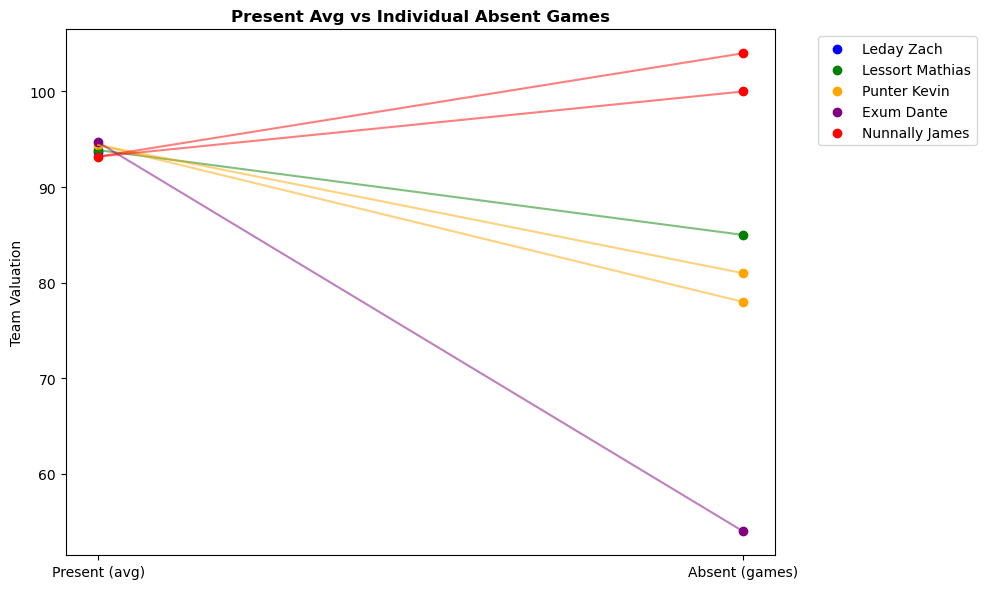

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

data = {"Player": ["Leday Zach", "Lessort Mathias", "Punter Kevin", "Exum Dante", "Nunnally James"],
        "Present Avg": [93.64, 93.87, 94.41, 94.68, 93.19]}
absent_games = {"Leday Zach": [], "Lessort Mathias": [85.0], "Punter Kevin": [78.0, 81.0],
                "Exum Dante": [54.0], "Nunnally James": [100.0, 104.0]}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ["blue", "green", "orange", "purple", "red"]
for i, (player, present) in enumerate(zip(df["Player"], df["Present Avg"])):
    ax.scatter([0], [present], color=colors[i], label=player)
    for absent_val in absent_games[player]:
        ax.scatter([1], [absent_val], color=colors[i])
        ax.plot([0, 1], [present, absent_val], color=colors[i], alpha=0.5)

ax.set_xticks([0, 1])
ax.set_xticklabels(["Present (avg)", "Absent (games)"])
ax.set_ylabel("Team Valuation")
ax.set_title("Present Avg vs Individual Absent Games", fontweight="bold")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Outcome

The plot shows each player’s average valuation when present (left) and valuations in absent games (right), connected by lines.

The visualization highlights significant drops for Punter, Kevin and Exum, Dante, a moderate drop for Lessort, Mathias, and an increase for Nunnally, James, reinforcing earlier findings.

Zach Leday’s points are compared when other key players are present versus absent.

In [9]:
# analyze Zach Leday’s performance (points)
zach_data = players[players["player"] == "Leday Zach"].merge(absence_pivot, on="round", how="left")
for key_player in key_players:
    if key_player == "Leday Zach":
        continue
    present_games = zach_data[zach_data[key_player] == False]["points"]
    absent_games = zach_data[zach_data[key_player] == True]["points"]
    print(f"\nZach Leday’s Points when {key_player} is:")
    print(f"Present: {present_games.mean():.2f} points (n={len(present_games)} games)")
    if len(absent_games) > 0:
        print(f"Absent: {absent_games.mean():.2f} points (n={len(absent_games)} games)")
    else:
        print(f"Absent: No absences recorded for {key_player}")


Zach Leday’s Points when Lessort Mathias is:
Present: 11.34 points (n=38 games)
Absent: 15.00 points (n=1 games)

Zach Leday’s Points when Punter Kevin is:
Present: 10.97 points (n=37 games)
Absent: 20.00 points (n=2 games)

Zach Leday’s Points when Exum Dante is:
Present: 11.58 points (n=38 games)
Absent: 6.00 points (n=1 games)

Zach Leday’s Points when Nunnally James is:
Present: 11.65 points (n=37 games)
Absent: 7.50 points (n=2 games)


### Interpretation  

- **Lessort Mathias:** **Zach Leday**’s points rise slightly (15.00 vs. 11.34), but this is based on one game, limiting the reliability of the trend.  
- **Punter Kevin:** **Zach Leday**’s points nearly double (20.00 vs. 10.97), suggesting a larger scoring role when Punter is absent.  
- **Exum Dante:** **Zach Leday**’s points drop (6.00 vs. 11.58), possibly due to reduced facilitation without Exum’s playmaking.  
- **Nunnally James:** **Zach Leday**’s points decrease (7.50 vs. 11.65), indicating reliance on Nunnally’s presence to create scoring opportunities.  

**Zach Leday** adapts his scoring based on who is absent, particularly excelling without **Punter Kevin**.

Zach Leday’s valuation is compared when other key players are present versus absent.

In [10]:
# analyze Zach Leday’s performance (valuation)
zach_data = players[players["player"] == "Leday Zach"].merge(absence_pivot, on="round", how="left")
for key_player in key_players:
    if key_player == "Leday Zach":
        continue
    present_games = zach_data[zach_data[key_player] == False]["valuation"]
    absent_games = zach_data[zach_data[key_player] == True]["valuation"]
    print(f"\nZach Leday’s Valuation when {key_player} is:")
    print(f"Present: {present_games.mean():.2f} valuation (n={len(present_games)} games)")
    if len(absent_games) > 0:
        print(f"Absent: {absent_games.mean():.2f} valuation (n={len(absent_games)} games)")
    else:
        print(f"Absent: No absences recorded for {key_player}")


Zach Leday’s Valuation when Lessort Mathias is:
Present: 13.89 valuation (n=38 games)
Absent: 21.00 valuation (n=1 games)

Zach Leday’s Valuation when Punter Kevin is:
Present: 13.59 valuation (n=37 games)
Absent: 23.00 valuation (n=2 games)

Zach Leday’s Valuation when Exum Dante is:
Present: 14.29 valuation (n=38 games)
Absent: 6.00 valuation (n=1 games)

Zach Leday’s Valuation when Nunnally James is:
Present: 14.30 valuation (n=37 games)
Absent: 10.00 valuation (n=2 games)


### Interpretation  

- **Lessort Mathias:** **Zach Leday**’s valuation rises (21.00 vs. 13.89), though this is based on one game, limiting its reliability.  
- **Punter Kevin:** **Zach Leday**’s valuation increases significantly (23.00 vs. 13.59), aligning with his points increase and suggesting a larger role without Punter.  
- **Exum Dante:** **Zach Leday**’s valuation drops (6.00 vs. 14.29), consistent with his points decrease, possibly due to reduced facilitation.  
- **Nunnally James:** **Zach Leday**’s valuation decreases (10.00 vs. 14.30), suggesting synergy with Nunnally that boosts Leday’s performance.  

**Zach Leday**’s overall performance peaks without **Punter Kevin** but suffers without **Exum Dante** or **Nunnally James**.

Zach Leday’s rebounds and assists are compared when other key players are present versus absent.

In [11]:
# analyze Zach Leday’s rebounds
print("Zach Leday’s Rebounds Analysis:")
for key_player in key_players:
    if key_player == "Leday Zach":
        continue
    present_games = zach_data[zach_data[key_player] == False]["total_rebounds"]
    absent_games = zach_data[zach_data[key_player] == True]["total_rebounds"]
    print(f"\nWhen {key_player} is:")
    print(f"Present: {present_games.mean():.2f} rebounds (n={len(present_games)} games)")
    if len(absent_games) > 0:
        print(f"Absent: {absent_games.mean():.2f} rebounds (n={len(absent_games)} games)")
    else:
        print(f"Absent: No absences recorded for {key_player}")

# analyze Zach Leday’s assists
print("\nZach Leday’s Assists Analysis:")
for key_player in key_players:
    if key_player == "Leday Zach":
        continue
    present_games = zach_data[zach_data[key_player] == False]["assists"]
    absent_games = zach_data[zach_data[key_player] == True]["assists"]
    print(f"\nWhen {key_player} is:")
    print(f"Present: {present_games.mean():.2f} assists (n={len(present_games)} games)")
    if len(absent_games) > 0:
        print(f"Absent: {absent_games.mean():.2f} assists (n={len(absent_games)} games)")
    else:
        print(f"Absent: No absences recorded for {key_player}")

Zach Leday’s Rebounds Analysis:

When Lessort Mathias is:
Present: 5.00 rebounds (n=38 games)
Absent: 8.00 rebounds (n=1 games)

When Punter Kevin is:
Present: 5.05 rebounds (n=37 games)
Absent: 5.50 rebounds (n=2 games)

When Exum Dante is:
Present: 5.08 rebounds (n=38 games)
Absent: 5.00 rebounds (n=1 games)

When Nunnally James is:
Present: 4.95 rebounds (n=37 games)
Absent: 7.50 rebounds (n=2 games)

Zach Leday’s Assists Analysis:

When Lessort Mathias is:
Present: 1.18 assists (n=38 games)
Absent: 2.00 assists (n=1 games)

When Punter Kevin is:
Present: 1.19 assists (n=37 games)
Absent: 1.50 assists (n=2 games)

When Exum Dante is:
Present: 1.24 assists (n=38 games)
Absent: 0.00 assists (n=1 games)

When Nunnally James is:
Present: 1.22 assists (n=37 games)
Absent: 1.00 assists (n=2 games)


### Interpretation  

#### Rebounds  
- Increase with **Lessort Mathias** (8.00 vs. 5.00) and **Nunnally James** (7.50 vs. 4.95) absent, showing **Zach Leday** compensates for their absence.  
- Stable with **Punter Kevin** and **Exum Dante** absences.  

#### Assists  
- Rise slightly with **Lessort Mathias** (2.00 vs. 1.18) and **Punter Kevin** (1.50 vs. 1.19) absent.  
- Drop to 0.00 with **Exum Dante** absent, suggesting **Zach Leday** relies on Exum’s playmaking.  
- Slight decrease with **Nunnally James** absent (1.00 vs. 1.22).  

**Zach Leday** adjusts his rebounding and passing based on teammates’ absences, particularly stepping up without **Lessort Mathias** or **Nunnally James**.

### Conclusion  

#### Key Findings  

**Team Performance:**  
- Absences of **Lessort Mathias**, **Punter Kevin**, and **Exum Dante** reduce team points and valuation.  
- **Nunnally James**’ absences slightly improve performance, though data is limited.  
- **Zach Leday**’s consistent presence (no absences) makes his direct impact untestable.  

**Zach Leday’s Performance:**  
- Points and valuation surge when **Punter Kevin** is absent, indicating a larger role.  
- Rebounds increase with **Lessort Mathias** and **Nunnally James** absent, showing adaptability.  
- Assists rise slightly without **Lessort Mathias** and **Punter Kevin** but drop without **Exum Dante**.  

#### Implications  
- **Team Strategy:** Depth is critical to mitigate drops in performance when **Punter Kevin** or **Exum Dante** are absent.  
- **Leday’s Role:** His versatility allows him to fill gaps, making him vital during roster disruptions.  
- **Coaching Adjustments:** Leveraging **Zach Leday**’s adaptability can maintain competitiveness when key players are out.